In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
#di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

### Clean Development Mechanism (CDM) data cleaning project part 2

Data source: https://cdm.unfccc.int/

Objective: clean data and reorganize so that team can more easily find relevant data and information.

The team was interested in types of CDM projects, number of CERs (certified emission reduction units) per project, trends by region and country, approving organizations, and failed projects.  

In [2]:
import pandas as pd
import numpy as np
import openpyxl
import xlrd
import xlwt
import xlsxwriter
import math

In [3]:
path = "Database for PAs and PoAs 2019.xlsx"
data = pd.ExcelFile(path)

The raw data was organized into 5 sheets: "CDM activities", "Issuances", "CPAs", "Prior Considerations", and "Country Codes". 

The team was interested in the data on the "CDM activities" sheet, but it was not organized in a way that made it easy to analyze. Countries were listed using codes and nothing was sorted. 

I replaced codes with country names by using the data from the "Country Codes" sheet. I also created two new spreadsheets: one sorted by country and one sorted by region. 

Below are the first 5 rows of the raw data sheet "CDM activities" followed by the first 5 entries in the column "List of Host countries (ISO 2)". The columns "List of Host countries (ISO 2)" and "Country Region" were used to sort the data into the two separate spreadsheets after replacing country codes with names. 

In [4]:
data.parse('CDM activities').head()

,CDM project reference number,Unique project identifier (traceable with Google),Registration project title,Type of CDM project: PA/PoA,Project classification,Sectoral scope number(s),Methodologies used at Registration,Project type (UNEP DTU),Project subtype (UNEP DTU),DOE,...,Estimated IRR including CERs,Issuance (Para 218)/ Registration (Para 219),Last information provided on Para. 218 and 219 of the PCP,Date of last information providedon Para. 218 and 219 of the PCP,Number of CPAs per HostParty (PoA),Amount of reduction per HostParty (PoA),Crediting type of the CPAs,Chronological number of registered CDM activity by country,Last communication with the Secretariat,Validity of the data
0,1.0,AuxID,Project for GHG emission reduction by thermal ...,PA,LARGE,11,AM0001,HFCs,HFC23,SGS United Kingdom Limited (SGS),...,NaN,Registration Process,Operating under CDM,42621.152662,NaN,NaN,NaN,IN(1),2016m9,18Sep2019
1,3.0,LJ80OQZR2JVOLTZZX4Y0EGB1N18AVO,HFC Decomposition Project in Ulsan,PA,LARGE,11,AM0001,HFCs,HFC23,Japan Quality Assurance Organisation (JQA),...,NaN,Registration Process,Operating under CDM,42618.309248,NaN,NaN,NaN,KR(1),2016m11,18Sep2019
2,8.0,SQA16OAS75TKWYZTTKK7G1LO0O8CMU,Brazil NovaGerar Landfill Gas to Energy Project,PA,LARGE,13,AM0003,Landfill gas,Landfill power,Det Norske Veritas- CUK,...,18.72,NaN,NaN,NaN,NaN,NaN,NaN,BR(1),2018m2,18Sep2019
3,9.0,HG20LFVJPFURJJ4M6E6MS07HTOZTR4,La Esperanza Hydroelectric Project,PA,SMALL,1,AMS-I.D.,Hydro,Run of river,Det Norske Veritas- CUK,...,NaN,Registration Process,Operating under CDM,42207.000000,NaN,NaN,NaN,HN(4),2018m9,18Sep2019
4,11.0,V3ZBEVSXGFNT31E2CECR2NYE93FW5L,Project for GHG Emission Reduction by Thermal ...,PA,LARGE,11,AM0001,HFCs,HFC23,Japan Quality Assurance Organisation (JQA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN(10),2018m12,18Sep2019


In [5]:
data.parse('CDM activities').loc[:,'List of Host countries (ISO 2)'].head()

0    IN
1    KR
2    BR
3    HN
4    CN
Name: List of Host countries (ISO 2), dtype: object

In [6]:
project_df = data.parse('CDM activities')
project_country = project_df.sort_values('List of Host countries (ISO 2)')

In [7]:
cols = ['List of Host countries (ISO 2)']  + [col for col in project_country if col != 'List of Host countries (ISO 2)']
project_country = project_country[cols]

In [8]:
#This method didn't work
#names = project_country['List of Host countries (ISO 2)'].unique().tolist()

#writer = pd.ExcelWriter("cdm_projects_country2.xlsx", engine='xlsxwriter')

#for myname in names:
    #mydf = project_country.loc[project_country['List of Host countries (ISO 2)']==myname]
    #mydf.to_excel(writer, sheet_name=myname)

#writer.save()

In [8]:
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AE'}, {'List of Host countries (ISO 2)': 'United Arab Emirates'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AF'}, {'List of Host countries (ISO 2)': 'Afghanistan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AG'}, {'List of Host countries (ISO 2)': 'Antigua and Barbuda'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AI'}, {'List of Host countries (ISO 2)': 'Anguilla'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AL'}, {'List of Host countries (ISO 2)': 'Albania'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AM'}, {'List of Host countries (ISO 2)': 'Armenia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AN'}, {'List of Host countries (ISO 2)': 'Netherlands Antilles'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AO'}, {'List of Host countries (ISO 2)': 'Angola'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AQ'}, {'List of Host countries (ISO 2)': 'Antarctica'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AR'}, {'List of Host countries (ISO 2)': 'Argentina'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AS'}, {'List of Host countries (ISO 2)': 'American Samoa'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AT'}, {'List of Host countries (ISO 2)': 'Austria'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AU'}, {'List of Host countries (ISO 2)': 'Australia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AW'}, {'List of Host countries (ISO 2)': 'Aruba'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'AZ'}, {'List of Host countries (ISO 2)': 'Azerbaijan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BA'}, {'List of Host countries (ISO 2)': 'Bosnia and Herzegovina'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BB'}, {'List of Host countries (ISO 2)': 'Barbados'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BD'}, {'List of Host countries (ISO 2)': 'Bangladesh'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BE'}, {'List of Host countries (ISO 2)': 'Belgium'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BF'}, {'List of Host countries (ISO 2)': 'Burkina Faso'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BG'}, {'List of Host countries (ISO 2)': 'Bulgaria'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BH'}, {'List of Host countries (ISO 2)': 'Bahrain'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BI'}, {'List of Host countries (ISO 2)': 'Burundi'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BJ'}, {'List of Host countries (ISO 2)': 'Benin'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BM'}, {'List of Host countries (ISO 2)': 'Bermuda'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BN'}, {'List of Host countries (ISO 2)': 'Brunei Darussalam'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BO'}, {'List of Host countries (ISO 2)': 'Bolivia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BR'}, {'List of Host countries (ISO 2)': 'Brazil'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BS'}, {'List of Host countries (ISO 2)': 'Bahamas'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BT'}, {'List of Host countries (ISO 2)': 'Bhutan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BV'}, {'List of Host countries (ISO 2)': 'Bouvet Island'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BW'}, {'List of Host countries (ISO 2)': 'Botswana'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BY'}, {'List of Host countries (ISO 2)': 'Belarus'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'BZ'}, {'List of Host countries (ISO 2)': 'Belize'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CA'}, {'List of Host countries (ISO 2)': 'Canada'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CC'}, {'List of Host countries (ISO 2)': 'Cocos Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CD'}, {'List of Host countries (ISO 2)': 'Democratic Republic of the Congo'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CF'}, {'List of Host countries (ISO 2)': 'Central African Republic'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CG'}, {'List of Host countries (ISO 2)': 'Congo'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CH'}, {'List of Host countries (ISO 2)': 'Switzerland'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CI'}, {'List of Host countries (ISO 2)': 'Cote d Ivoire'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CK'}, {'List of Host countries (ISO 2)': 'Cook Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CL'}, {'List of Host countries (ISO 2)': 'Chile'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CM'}, {'List of Host countries (ISO 2)': 'Camaroon'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CN'}, {'List of Host countries (ISO 2)': 'China'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CO'}, {'List of Host countries (ISO 2)': 'Colombia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CR'}, {'List of Host countries (ISO 2)': 'Costa Rica'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CT'}, {'List of Host countries (ISO 2)': 'Canton and Elderbury Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CU'}, {'List of Host countries (ISO 2)': 'Cuba'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CV'}, {'List of Host countries (ISO 2)': 'Cape Verde'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CX'}, {'List of Host countries (ISO 2)': 'Christmas Island'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CY'}, {'List of Host countries (ISO 2)': 'Cyprus'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'CZ'}, {'List of Host countries (ISO 2)': 'Czech Republic'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'DE'}, {'List of Host countries (ISO 2)': 'Germany'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'DJ'}, {'List of Host countries (ISO 2)': 'Djibouti'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'DK'}, {'List of Host countries (ISO 2)': 'Denmark'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'DM'}, {'List of Host countries (ISO 2)': 'Dominica'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'DO'}, {'List of Host countries (ISO 2)': 'Dominican Republic'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'DZ'}, {'List of Host countries (ISO 2)': 'Algeria'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'EC'}, {'List of Host countries (ISO 2)': 'Ecuador'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'EE'}, {'List of Host countries (ISO 2)': 'Estonia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'EG'}, {'List of Host countries (ISO 2)': 'Egypt'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ER'}, {'List of Host countries (ISO 2)': 'Eritria'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ES'}, {'List of Host countries (ISO 2)': 'Spain'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ET'}, {'List of Host countries (ISO 2)': 'Ethiopia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'FI'}, {'List of Host countries (ISO 2)': 'Finland'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'FJ'}, {'List of Host countries (ISO 2)': 'Fiji'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'FK'}, {'List of Host countries (ISO 2)': 'Falkland Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'FM'}, {'List of Host countries (ISO 2)': 'Federal States of Micronesia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'FO'}, {'List of Host countries (ISO 2)': 'Faroe Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'FR'}, {'List of Host countries (ISO 2)': 'France'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GA'}, {'List of Host countries (ISO 2)': 'Gabon'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GB'}, {'List of Host countries (ISO 2)': 'United Kingdom of Great Britain and Northern Ireland'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GD'}, {'List of Host countries (ISO 2)': 'Grenada'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GE'}, {'List of Host countries (ISO 2)': 'Georgia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GF'}, {'List of Host countries (ISO 2)': 'French Guiana'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GH'}, {'List of Host countries (ISO 2)': 'Ghana'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GL'}, {'List of Host countries (ISO 2)': 'Greenland'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GM'}, {'List of Host countries (ISO 2)': 'Gambia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GN'}, {'List of Host countries (ISO 2)': 'Guinea'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GP'}, {'List of Host countries (ISO 2)': 'Guadaloupe'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GQ'}, {'List of Host countries (ISO 2)': 'Equatorial Guinea'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GR'}, {'List of Host countries (ISO 2)': 'Greece'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GS'}, {'List of Host countries (ISO 2)': 'South Georgia and South Sandwich Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GT'}, {'List of Host countries (ISO 2)': 'Guatemala'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GU'}, {'List of Host countries (ISO 2)': 'Guam'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GW'}, {'List of Host countries (ISO 2)': 'Guinea-Bissau'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'GY'}, {'List of Host countries (ISO 2)': 'Guyana'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'HK'}, {'List of Host countries (ISO 2)': 'Hong Kong'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'HM'}, {'List of Host countries (ISO 2)': 'Heard and McDonald Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'HN'}, {'List of Host countries (ISO 2)': 'Honduras'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'HR'}, {'List of Host countries (ISO 2)': 'Croatia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'HT'}, {'List of Host countries (ISO 2)': 'Haiti'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'HU'}, {'List of Host countries (ISO 2)': 'Hungary'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ID'}, {'List of Host countries (ISO 2)': 'Indonesia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'IE'}, {'List of Host countries (ISO 2)': 'Ireland'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'IL'}, {'List of Host countries (ISO 2)': 'Israel'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'IN'}, {'List of Host countries (ISO 2)': 'India'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'IQ'}, {'List of Host countries (ISO 2)': 'Iraq'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'IR'}, {'List of Host countries (ISO 2)': 'Iran'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'IS'}, {'List of Host countries (ISO 2)': 'Iceland'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'IT'}, {'List of Host countries (ISO 2)': 'Italy'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'JM'}, {'List of Host countries (ISO 2)': 'Jamaica'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'JO'}, {'List of Host countries (ISO 2)': 'Jordan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'JP'}, {'List of Host countries (ISO 2)': 'Japan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'JT'}, {'List of Host countries (ISO 2)': 'Johnston Island'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KE'}, {'List of Host countries (ISO 2)': 'Kenya'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KG'}, {'List of Host countries (ISO 2)': 'Kyrgyzstan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KH'}, {'List of Host countries (ISO 2)': 'Cambodia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KI'}, {'List of Host countries (ISO 2)': 'Kiribati'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KM'}, {'List of Host countries (ISO 2)': 'Comoros'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KN'}, {'List of Host countries (ISO 2)': 'Saint Kitts and Nevis'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KP'}, {'List of Host countries (ISO 2)': 'Democratic Peoples Republic of Korea'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KR'}, {'List of Host countries (ISO 2)': 'Republic of Korea'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KW'}, {'List of Host countries (ISO 2)': 'Kuwait'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KY'}, {'List of Host countries (ISO 2)': 'Cayman Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'KZ'}, {'List of Host countries (ISO 2)': 'Kazakhstan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LA'}, {'List of Host countries (ISO 2)': 'Lao Peoples Democratic Republic'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LB'}, {'List of Host countries (ISO 2)': 'Lebanon'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LC'}, {'List of Host countries (ISO 2)': 'Saint Lucia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LI'}, {'List of Host countries (ISO 2)': 'Liechtenstein'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LK'}, {'List of Host countries (ISO 2)': 'Sri Lanka'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LR'}, {'List of Host countries (ISO 2)': 'Liberia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LS'}, {'List of Host countries (ISO 2)': 'Lesotho'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LT'}, {'List of Host countries (ISO 2)': 'Lithuania'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LU'}, {'List of Host countries (ISO 2)': 'Luxembourg'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LV'}, {'List of Host countries (ISO 2)': 'Latvia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'LY'}, {'List of Host countries (ISO 2)': 'Libia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MA'}, {'List of Host countries (ISO 2)': 'Morocco'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MC'}, {'List of Host countries (ISO 2)': 'Monaco'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MD'}, {'List of Host countries (ISO 2)': 'Republic of Moldova'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ME'}, {'List of Host countries (ISO 2)': 'Montenegro'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MG'}, {'List of Host countries (ISO 2)': 'Madagascar'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MH'}, {'List of Host countries (ISO 2)': 'Marshall Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MI'}, {'List of Host countries (ISO 2)': 'Midway Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MK'}, {'List of Host countries (ISO 2)': 'The Former Yugoslav Republic of Macedonia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ML'}, {'List of Host countries (ISO 2)': 'Mali'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MM'}, {'List of Host countries (ISO 2)': 'Myanmar'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MN'}, {'List of Host countries (ISO 2)': 'Mongolia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MO'}, {'List of Host countries (ISO 2)': 'Macau'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MP'}, {'List of Host countries (ISO 2)': 'Northern Mariana Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MQ'}, {'List of Host countries (ISO 2)': 'Martinique'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MR'}, {'List of Host countries (ISO 2)': 'Mauritania'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MS'}, {'List of Host countries (ISO 2)': 'Montserrat'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MT'}, {'List of Host countries (ISO 2)': 'Malta'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MU'}, {'List of Host countries (ISO 2)': 'Mauritius'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MD'}, {'List of Host countries (ISO 2)': 'Maldives'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MW'}, {'List of Host countries (ISO 2)': 'Malawi'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MX'}, {'List of Host countries (ISO 2)': 'Mexico'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MY'}, {'List of Host countries (ISO 2)': 'Malaysia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'MZ'}, {'List of Host countries (ISO 2)': 'Mozambique'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NA'}, {'List of Host countries (ISO 2)': 'Namibia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NC'}, {'List of Host countries (ISO 2)': 'New Caledonia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NE'}, {'List of Host countries (ISO 2)': 'Niger'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NF'}, {'List of Host countries (ISO 2)': 'Norfolk Island'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NG'}, {'List of Host countries (ISO 2)': 'Nigeria'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NI'}, {'List of Host countries (ISO 2)': 'Nicaragua'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NL'}, {'List of Host countries (ISO 2)': 'Netherlands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NO'}, {'List of Host countries (ISO 2)': 'Norway'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NP'}, {'List of Host countries (ISO 2)': 'Nepal'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NR'}, {'List of Host countries (ISO 2)': 'Nauru'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NU'}, {'List of Host countries (ISO 2)': 'Niue'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'NZ'}, {'List of Host countries (ISO 2)': 'New Zealand'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'OM'}, {'List of Host countries (ISO 2)': 'Oman'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PA'}, {'List of Host countries (ISO 2)': 'Panama'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PE'}, {'List of Host countries (ISO 2)': 'Peru'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PF'}, {'List of Host countries (ISO 2)': 'French Polynesia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PG'}, {'List of Host countries (ISO 2)': 'Papua New Guinea'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PH'}, {'List of Host countries (ISO 2)': 'Philippines'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PK'}, {'List of Host countries (ISO 2)': 'Pakistan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PL'}, {'List of Host countries (ISO 2)': 'Poland'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PM'}, {'List of Host countries (ISO 2)': 'St Pierre and Miquelon'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PN'}, {'List of Host countries (ISO 2)': 'Pitcairn'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PR'}, {'List of Host countries (ISO 2)': 'Puerto Rico'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PT'}, {'List of Host countries (ISO 2)': 'Portugal'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PW'}, {'List of Host countries (ISO 2)': 'Palau'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'PY'}, {'List of Host countries (ISO 2)': 'Paraguay'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'QA'}, {'List of Host countries (ISO 2)': 'Qatar'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'RE'}, {'List of Host countries (ISO 2)': 'Reunion'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'RO'}, {'List of Host countries (ISO 2)': 'Romania'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'RS'}, {'List of Host countries (ISO 2)': 'Serbia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'RU'}, {'List of Host countries (ISO 2)': 'Russian Federation'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'RW'}, {'List of Host countries (ISO 2)': 'Rwanda'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SA'}, {'List of Host countries (ISO 2)': 'Saudi Arabia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SB'}, {'List of Host countries (ISO 2)': 'Solomon Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SC'}, {'List of Host countries (ISO 2)': 'Seychelles'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SD'}, {'List of Host countries (ISO 2)': 'Sudan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SE'}, {'List of Host countries (ISO 2)': 'Swedan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SG'}, {'List of Host countries (ISO 2)': 'Singapore'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SH'}, {'List of Host countries (ISO 2)': 'Saint Helena'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SI'}, {'List of Host countries (ISO 2)': 'Slovenia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SJ'}, {'List of Host countries (ISO 2)': 'Svalbard and Jan Mayen Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SK'}, {'List of Host countries (ISO 2)': 'Slovakia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SL'}, {'List of Host countries (ISO 2)': 'Sierra Leone'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SM'}, {'List of Host countries (ISO 2)': 'San Marino'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SN'}, {'List of Host countries (ISO 2)': 'Senegal'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SO'}, {'List of Host countries (ISO 2)': 'Somalia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SR'}, {'List of Host countries (ISO 2)': 'Surinami'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SS'}, {'List of Host countries (ISO 2)': 'Republic of South Sudan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ST'}, {'List of Host countries (ISO 2)': 'Sao Tome and Principe'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SV'}, {'List of Host countries (ISO 2)': 'El Salvador'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SY'}, {'List of Host countries (ISO 2)': 'Syrian Arab Republic'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'SZ'}, {'List of Host countries (ISO 2)': 'Swaziland'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TC'}, {'List of Host countries (ISO 2)': 'Turks and Caicos Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TD'}, {'List of Host countries (ISO 2)': 'Chad'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TG'}, {'List of Host countries (ISO 2)': 'Togo'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TH'}, {'List of Host countries (ISO 2)': 'Thailand'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TJ'}, {'List of Host countries (ISO 2)': 'Tajikistan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TK'}, {'List of Host countries (ISO 2)': 'Tokelau'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TL'}, {'List of Host countries (ISO 2)': 'Timor-Leste'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TM'}, {'List of Host countries (ISO 2)': 'Turkmenistan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TN'}, {'List of Host countries (ISO 2)': 'Tunisia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TO'}, {'List of Host countries (ISO 2)': 'Tonga'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TR'}, {'List of Host countries (ISO 2)': 'Turkey'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TT'}, {'List of Host countries (ISO 2)': 'Trinidad and Tobago'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TV'}, {'List of Host countries (ISO 2)': 'Tuvalu'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'TZ'}, {'List of Host countries (ISO 2)': 'United Republic of Tanzania'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'UA'}, {'List of Host countries (ISO 2)': 'Ukraine'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'UG'}, {'List of Host countries (ISO 2)': 'Uganda'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'UM'}, {'List of Host countries (ISO 2)': 'United States Minor Outlying Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'US'}, {'List of Host countries (ISO 2)': 'United States of America'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'UY'}, {'List of Host countries (ISO 2)': 'Uruguay'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'UZ'}, {'List of Host countries (ISO 2)': 'Uzbekistan'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'VA'}, {'List of Host countries (ISO 2)': 'Holy See'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'VC'}, {'List of Host countries (ISO 2)': 'Saint Vincent and the Grenadines'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'VE'}, {'List of Host countries (ISO 2)': 'Venezuela'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'VG'}, {'List of Host countries (ISO 2)': 'Virgin Islands - British'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'VI'}, {'List of Host countries (ISO 2)': 'Virgin Islands - US'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'VN'}, {'List of Host countries (ISO 2)': 'Viet Nam'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'VU'}, {'List of Host countries (ISO 2)': 'Vanuatu'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'WF'}, {'List of Host countries (ISO 2)': 'Wallis and Futuna Islands'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'WK'}, {'List of Host countries (ISO 2)': 'Wake Island'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'WS'}, {'List of Host countries (ISO 2)': 'Samoa'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'YE'}, {'List of Host countries (ISO 2)': 'Yemen'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'YT'}, {'List of Host countries (ISO 2)': 'Mayotte'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'YU'}, {'List of Host countries (ISO 2)': 'Serbia and Montenegro'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ZA'}, {'List of Host countries (ISO 2)': 'South Africa'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ZM'}, {'List of Host countries (ISO 2)': 'Zambia'}, regex=True)
project_country = project_country.replace({'List of Host countries (ISO 2)': 'ZW'}, {'List of Host countries (ISO 2)': 'Zimbabwe'}, regex=True)

In [9]:
project_country = project_country.sort_values('List of Host countries (ISO 2)')

#### New spreadsheet sorted by country: 
Below are the first 5 rows of the new spreadsheet sorted by country. 

In [10]:
project_country.head()

,List of Host countries (ISO 2),CDM project reference number,Unique project identifier (traceable with Google),Registration project title,Type of CDM project: PA/PoA,Project classification,Sectoral scope number(s),Methodologies used at Registration,Project type (UNEP DTU),Project subtype (UNEP DTU),...,Estimated IRR including CERs,Issuance (Para 218)/ Registration (Para 219),Last information provided on Para. 218 and 219 of the PCP,Date of last information providedon Para. 218 and 219 of the PCP,Number of CPAs per HostParty (PoA),Amount of reduction per HostParty (PoA),Crediting type of the CPAs,Chronological number of registered CDM activity by country,Last communication with the Secretariat,Validity of the data
4606,Albania,5662.0,LBH560OTR3BO2ETOU6EH3RLNXUGX29,HPP Ashta,PA,LARGE,1,ACM0002,Hydro,Existing dam,...,NaN,Registration Process,Operating under CDM,42208.0,NaN,NaN,NaN,AL(3),2018m6,18Sep2019
8978,Albania,NaN,AJPEKEUWN3GZ9MOINEVTOA7AA3Y2IQ,Rapuni 1 & 2 Small Hydroelectric Power Project...,PA,SMALL,1,AMS-I.D.,Hydro,Run of river,...,12.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013m3,18Sep2019
10000,Albania,NaN,PV2TUOMT42JT6FIYXSOY6MZY4P8K4A,Combined Heat and Power (CHP) in the Universit...,PA,SMALL,1; 3,AMS-I.D.; AMS-II.E.,EE supply side,Cogeneration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009m3,18Sep2019
5587,Albania,6825.0,WZ82P6CHV8127G6TPKP7Q29RJ67UG0,Small Hydropower Programme of Activities in Al...,PoA,SMALL,1,AMS-I.D.,Hydro,Run of river+new dam,...,NaN,NaN,NaN,NaN,AL (1),AL (9130),Only One Renewable CPA,AL(4),2013m11,18Sep2019
12995,Albania,NaN,WV4T2X8RJ2YKE9KYQQCIAHMOMTB5G2,Energy efficiency in the University Dormitory ...,PA,SMALL,1; 3,AMS-I.D.; AMS-II.E.,EE service,EE public buildings,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009m3,18Sep2019


In [35]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('cdm_projects_country.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
project_country.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [11]:
project_region = project_country.sort_values('Country Region')
cols = ['Country Region']  + [col for col in project_country if col != 'Country Region']
project_region = project_region[cols]

#### New spreadsheet sorted by region: 
Below are the first 5 rows of the new spreadsheet sorted by region. 

In [12]:
project_region.head()

,Country Region,List of Host countries (ISO 2),CDM project reference number,Unique project identifier (traceable with Google),Registration project title,Type of CDM project: PA/PoA,Project classification,Sectoral scope number(s),Methodologies used at Registration,Project type (UNEP DTU),...,Estimated IRR including CERs,Issuance (Para 218)/ Registration (Para 219),Last information provided on Para. 218 and 219 of the PCP,Date of last information providedon Para. 218 and 219 of the PCP,Number of CPAs per HostParty (PoA),Amount of reduction per HostParty (PoA),Crediting type of the CPAs,Chronological number of registered CDM activity by country,Last communication with the Secretariat,Validity of the data
9071,; Africa,Angola; Botswana; Democratic Republic of the C...,NaN,7HB3XEK1HI5FF6AURCEM21LADMY98H,CDM Africa Small Scale Hydro PoA for Southern ...,PoA,SMALL,NaN,AMS-I.D.,Hydro,...,NaN,NaN,NaN,NaN,NaN,NaN,Non-included CPAs,NaN,2019m7,18Sep2019
9491,; Africa; Americas; Asia; Oceania,Barbados; Burundi; Bolivia; Botswana; Belize; ...,NaN,LYASMHII14XF02XM3LU9ERNQ2W2U7X,For Stoves Programme of Activities,PoA,SMALL,NaN,AMS-II.G.,EE households,...,NaN,NaN,NaN,NaN,NaN,NaN,Non-included CPAs,NaN,2019m7,18Sep2019
9983,; Asia,Brunei Darussalam; Indonesia; Cambodia; Lao Pe...,NaN,EXXF1VXF5BWZ6KKOCGKVGG06EHDS1J,The Solar United Network South East Asia Pacif...,PoA,LARGE,NaN,ACM0002; AMS-I.D.; AMS-I.F.,Solar,...,NaN,NaN,NaN,NaN,NaN,NaN,Non-included CPAs,NaN,2019m2,18Sep2019
7843,Africa,NaN,9310.0,7ZSD7B5DWGS87L2QOTYXWSZ5X2BZ1X,"Power generation from biogas in Windhoek, Namibia",PA,SMALL,1,AMS-I.C.; AMS-III.H.,Methane avoidance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA(3),2015m5,18Sep2019
10973,Africa,Morocco,NaN,49AEX47JZTIC73NU4YQZ5P3AFAKXXU,Greenhouse Gas Emission in the Fish Meal Indus...,PA,LARGE,1,AM0056,Solar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008m4,18Sep2019


In [38]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('cdm_projects_region.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
project_region.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [13]:
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *
import plotly
import plotly.graph_objs as go

In [14]:
plotly.tools.set_credentials_file(username = 'ppatterson', api_key='jK180Tj3zyqIgqswVizx')
mapbox_token = 'pk.eyJ1IjoicGFtZWxvdDMxNyIsImEiOiJjajBlMnIzbGwwMTE0MzNwNHB3Mmt2MHI1In0.jvc8C_8qJonSMXVL-tFOfg'

In [54]:
import matplotlib
import matplotlib.pyplot as plt
from geojson import dumps
import geojson as g
from matplotlib import rc
%matplotlib inline
plt.style.use('ggplot')

In [24]:
counts = project_region['Project type (UNEP DTU)'].value_counts()
counts

Wind                     3083
Hydro                    3033
Biomass energy           1512
Methane avoidance        1200
EE own generation         841
Landfill gas              645
Solar                     596
EE industry               334
EE households             266
Fossil fuel switch        259
EE supply side            213
Coal bed/mine methane     183
N2O                       117
Fugitive                  108
EE service                108
Cement                     98
Reforestation              93
Transport                  74
Geothermal                 44
Energy distribution        41
Mixed renewables           29
Hybrid renewables          27
HFCs                       27
PFCs and SF6               25
Afforestation              20
Agriculture                 6
CO2 usage                   6
Tidal                       2
Biogas                      2
EE Industry                 2
Biomass Energy              1
Solar & wind                1
Name: Project type (UNEP DTU), dtype: in

In [112]:
project_region['Latin America'] = np.where(project_region['Country Region'] == 'Americas', 1, 0)
project_region['Chile'] = np.where(project_region['List of Host countries (ISO 2)'] == 'Chile', 1, 0)

In [117]:
project_region_numbers = project_region.loc[:,['Project type (UNEP DTU)','Total capital investment (USD)','Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr', 'Latin America', 'Chile']]
project_region_numbers['Total'] = 1
project_region_numbers.head()

,Project type (UNEP DTU),Total capital investment (USD),Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr,Latin America,Chile,Total
9071,Hydro,NaN,13200,0,0,1
9491,EE households,NaN,62624,0,0,1
9983,Solar,NaN,219564,0,0,1
7843,Methane avoidance,NaN,7869,0,0,1
10973,Solar,NaN,7078,0,0,1


In [118]:
project_types_numbers = project_region_numbers.groupby('Project type (UNEP DTU)').sum()
project_types_numbers

,Total capital investment (USD),Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr,Latin America,Chile,Total
Project type (UNEP DTU),,,,,
Afforestation,1.768201e+07,1317449,5,2,20
Agriculture,NaN,86622,0,0,6
Biogas,NaN,417158,0,0,2
Biomass Energy,NaN,28703,0,0,1
Biomass energy,2.091607e+10,97414393,312,21,1512
CO2 usage,2.321408e+07,132650,5,1,6
Cement,3.144700e+08,13983507,13,0,98
Coal bed/mine methane,2.670493e+09,111356324,6,0,183
EE Industry,NaN,22548,0,0,2


In [119]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('cdm_projects_types_counts.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
project_types_numbers.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [38]:
totals = project_region['Project type (UNEP DTU)'].value_counts()

In [39]:
hydro_total = totals['Hydro']

In [40]:
totals.sum()

12996

In [41]:
len(project_region)

12997

In [42]:
non_hydro_total = totals.sum() - hydro_total

In [43]:
non_hydro_total

9963

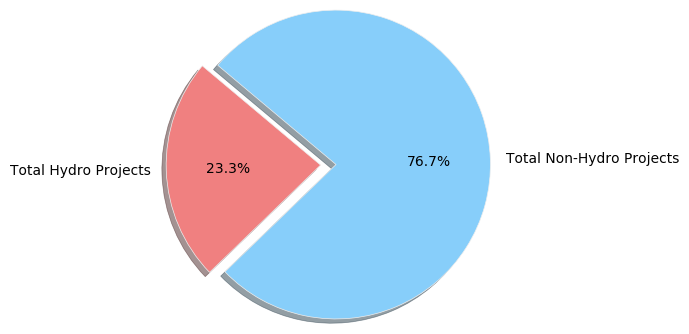

In [78]:
labels = ['Total Hydro Projects', 'Total Non-Hydro Projects']
sizes = [hydro_total, non_hydro_total]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
#patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)

#plt.title('Global CDM Projects Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels = labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
#plt.legend(patches, labels, bbox_to_anchor=(1,0.5), loc="center right")

plt.axis('equal')
plt.savefig('GlobalCDMtotals.png')
plt.show()

In [79]:
hydro_df = project_region.loc[project_region['Project type (UNEP DTU)'] == 'Hydro']

In [80]:
non_hydro_df = project_region.loc[project_region['Project type (UNEP DTU)'] != 'Hydro']

In [81]:
hydro_money = hydro_df['Total capital investment (USD)'].sum()

In [82]:
hydro_money

159646495728.27072

In [83]:
non_hydro_money = non_hydro_df['Total capital investment (USD)'].sum()

In [84]:
non_hydro_money

386996999561.7716

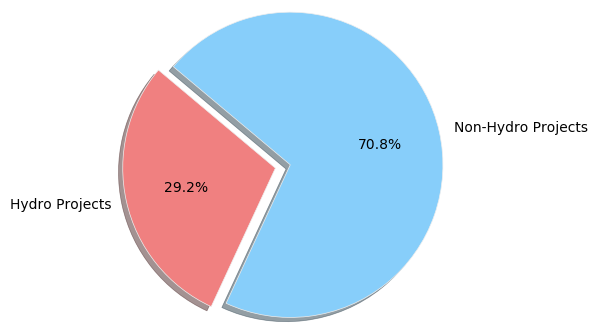

In [85]:
labels = ['Hydro Projects', 'Non-Hydro Projects']
sizes = [hydro_money, non_hydro_money]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

#plt.title('Global CDM Project Costs Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('GlobalCDMcosts.png')
plt.show()

In [86]:
hydro_reductions = hydro_df['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()

In [87]:
non_hydro_reductions = non_hydro_df['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()

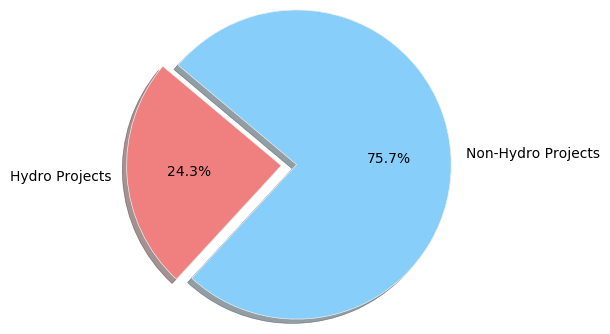

In [88]:
labels = ['Hydro Projects', 'Non-Hydro Projects']
sizes = [hydro_reductions, non_hydro_reductions]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

#plt.title('Global CDM Project Claimed Reductions Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('GlobalCDMreductions.png')
plt.show()

In [89]:
latin_df = project_region.loc[project_region['Country Region'] == 'Americas']

In [90]:
latin_df_hydro = latin_df.loc[latin_df['Project type (UNEP DTU)'] == 'Hydro']

In [91]:
latin_df_non_hydro = latin_df.loc[latin_df['Project type (UNEP DTU)'] != 'Hydro']

In [92]:
latin_totals = latin_df['Project type (UNEP DTU)'].value_counts()
latin_hydro_total = latin_totals['Hydro']

In [93]:
latin_non_hydro_total = latin_totals.sum() - latin_hydro_total

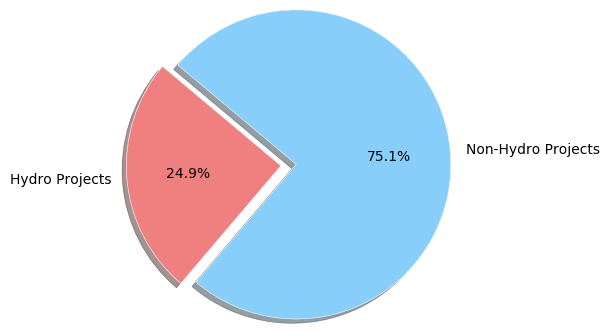

In [94]:
labels = ['Hydro Projects', 'Non-Hydro Projects']
sizes = [latin_hydro_total, latin_non_hydro_total]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

#plt.title('Latin America CDM Projects Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('LatinCDMtotals.png')
plt.show()

In [95]:
latin_hydro_reductions = latin_df_hydro['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()
latin_non_hydro_reductions = latin_df_non_hydro['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()

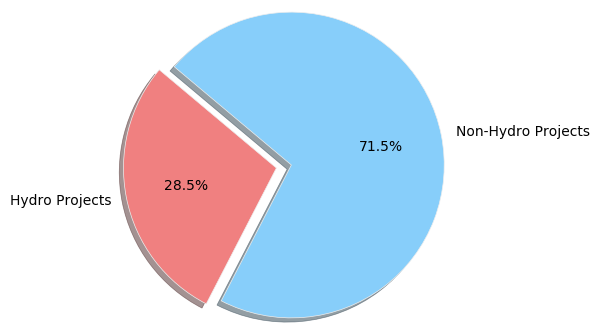

In [98]:
labels = ['Hydro Projects', 'Non-Hydro Projects']
sizes = [latin_hydro_reductions, latin_non_hydro_reductions]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

#plt.title('Latin America CDM Project Claimed Reductions Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('LatinCDMreductions.png')
plt.show()

In [99]:
latin_hydro_money = latin_df_hydro['Total capital investment (USD)'].sum()
latin_non_hydro_money = latin_df_non_hydro['Total capital investment (USD)'].sum()

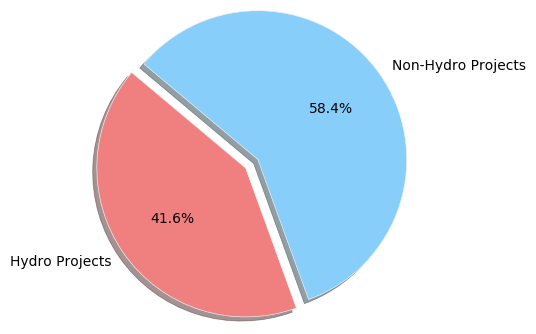

In [100]:
labels = ['Hydro Projects', 'Non-Hydro Projects']
sizes = [latin_hydro_money, latin_non_hydro_money]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

#plt.title('Latin America CDM Project Costs Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('LatinCDMcosts.png')
plt.show()

In [101]:
chile_df = project_region.loc[project_region['List of Host countries (ISO 2)'] == 'Chile']

In [102]:
chile_df_hydro = chile_df.loc[chile_df['Project type (UNEP DTU)'] == 'Hydro']
chile_df_non_hydro = chile_df.loc[chile_df['Project type (UNEP DTU)'] != 'Hydro']

In [103]:
chile_totals = chile_df['Project type (UNEP DTU)'].value_counts()
chile_hydro_total = chile_totals['Hydro']
chile_non_hydro_total = chile_totals.sum() - chile_hydro_total

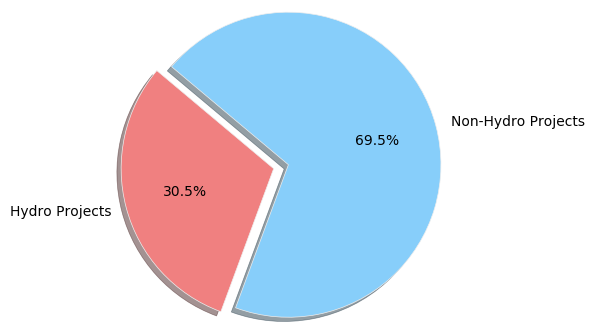

In [104]:
labels = ['Hydro Projects', 'Non-Hydro Projects']
sizes = [chile_hydro_total, chile_non_hydro_total]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

#plt.title('Chile CDM Projects Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('ChileCDMtotals.png')
plt.show()

In [105]:
chile_hydro_reductions = chile_df_hydro['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()
chile_non_hydro_reductions = chile_df_non_hydro['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()

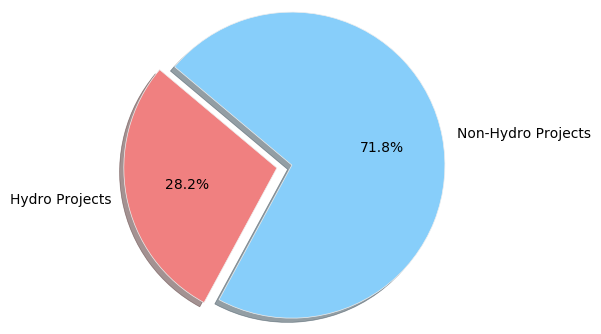

In [106]:
labels = ['Hydro Projects', 'Non-Hydro Projects']
sizes = [chile_hydro_reductions, chile_non_hydro_reductions]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

#plt.title('Chile CDM Project Claimed Reductions Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('ChileCDMreductions.png')
plt.show()

In [107]:
chile_hydro_money = chile_df_hydro['Total capital investment (USD)'].sum()
chile_non_hydro_money = chile_df_non_hydro['Total capital investment (USD)'].sum()

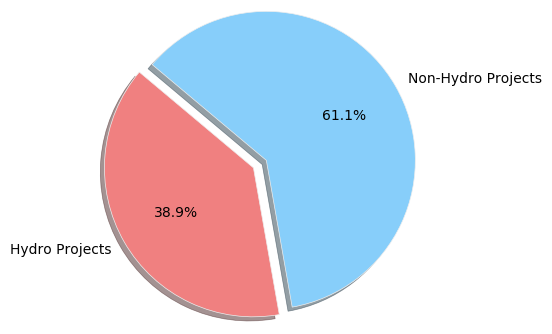

In [108]:
labels = ['Hydro Projects', 'Non-Hydro Projects']
sizes = [chile_hydro_money, chile_non_hydro_money]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

#plt.title('Chile CDM Project Costs Hydro vs. Non-Hydro 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('ChileCDMcosts.png')
plt.show()

In [109]:
chile_df_hydro['Registration project title']

795               Chacabuquito Hydroelectric Power Project
8226                Monreal Hydroelectric Project in Aysen
10072      Hydro Electrical Power Plant Rio Huasco Project
7840                                  Roblería Small Hydro
7558                  San Andrés Hydropower Project, Chile
12641    Baquedano Small run-of-river Hydroelectric Pro...
4741                       Providencia Hydroelectric Plant
9887                  Chile: Chiburgo Run-Of-River Project
167                La Higuera Hydroelectric Project, Chile
11159    Molinos de Agua Run-of-the-River Hydroelectric...
9889                       Achibueno Hydroelectric Project
10679              Canal Bío-Bío Sur Hydroelectric Project
1781                       Cuchildeo Hydroelectric Project
6474                             Lican Hydroelectric Plant
3140                        Guayacán Hydroelectric Project
9555     Chilean Small Hydroelectric Power Plants Progr...
9600                     Mini hydro power plant El Manza

In [110]:
len(chile_df_hydro)

57

In [93]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Chile_Hydro_CDM_2019.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
chile_df_hydro.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [120]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Latin_Hydro_CDM_2019.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
latin_df_hydro.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [121]:
global_hydro = project_region.loc[project_region['Project type (UNEP DTU)'] == 'Hydro']
global_renewables = project_region.loc[project_region['Project type (UNEP DTU)'].isin(['Wind', 'Solar', 'Geothermal', 'Mixed renewables', 'Hybrid renewables', 'Solar & wind', 'Biomass energy', 'Biomass Energy', 'Tidal', 'Biogas'])]

In [122]:
global_hydro_total = len(global_hydro)

In [123]:
global_renewables_total = len(global_renewables)

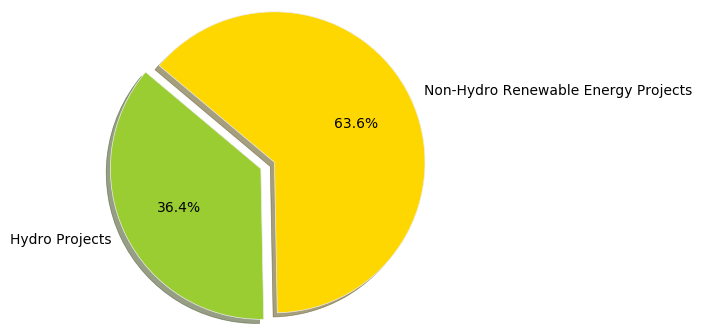

In [124]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [global_hydro_total, global_renewables_total]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Global CDM Projects Hydro vs. Non-Hydro Renewable Energy 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('GlobalCDM_renewables_totals.png')
plt.show()

In [125]:
global_hydro_money = global_hydro['Total capital investment (USD)'].sum()
global_renewables_money = global_renewables['Total capital investment (USD)'].sum()

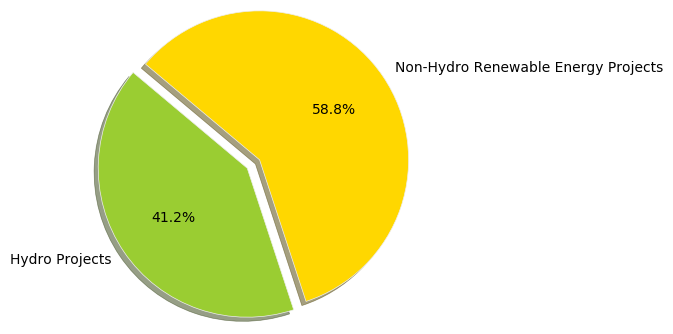

In [126]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [global_hydro_money, global_renewables_money]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Global CDM Project Costs Hydro vs. Non-Hydro Rewable Energy 2019')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('GlobalCDM_renewables_costs.png')
plt.show()

In [127]:
global_hydro_reductions = global_hydro['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()
global_renewables_reductions = global_renewables['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()

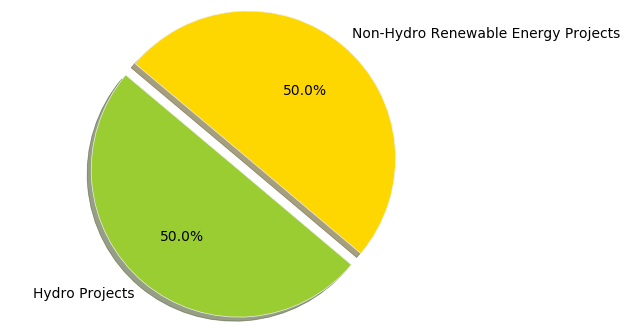

In [128]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [global_hydro_reductions, global_renewables_reductions]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Global CDM Project Claimed Reductions Hydro vs. Non-Hydro Rewable Energy 2019\n ', loc='left')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('GlobalCDM_renewables_reductions.png')
plt.show()

In [129]:
latin_df_renewables = latin_df.loc[latin_df['Project type (UNEP DTU)'].isin(['Wind', 'Solar', 'Geothermal', 'Mixed renewables', 'Hybrid renewables', 'Solar & wind'])]

In [130]:
latin_renewables_total = len(latin_df_renewables)

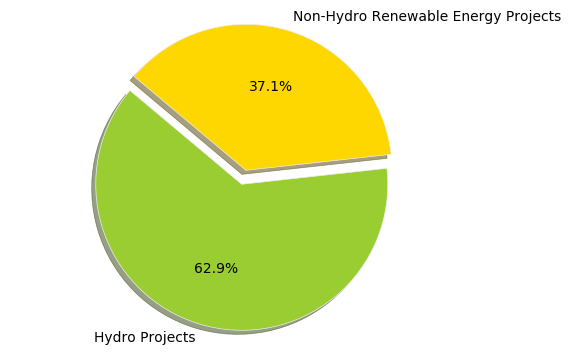

In [131]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [latin_hydro_total, latin_renewables_total]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Latin America CDM Projects Hydro vs. Non-Hydro Renewable Energy 2019\n ', loc='left')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('LatinCDM_renewables_totals.png')
plt.show()

In [132]:
latin_renewables_reductions = latin_df_renewables['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()

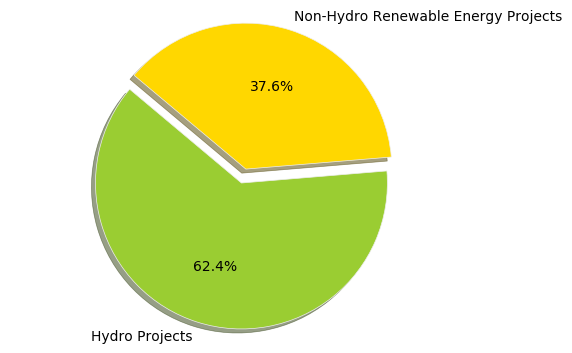

In [133]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [latin_hydro_reductions, latin_renewables_reductions]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Latin America CDM Project Claimed Reductions Hydro vs. Non-Hydro Renewable Energy 2019\n ', loc='left')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('LatinCDM_renewables_reductions.png')
plt.show()

In [134]:
latin_renewables_money = latin_df_renewables['Total capital investment (USD)'].sum()

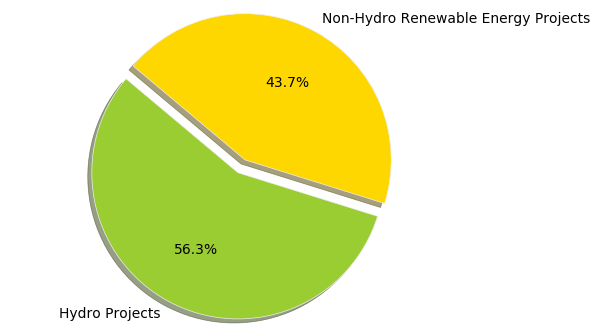

In [135]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [latin_hydro_money, latin_renewables_money]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Latin America CDM Project Costs Hydro vs. Non-Hydro Renewable Energy 2019\n ', loc = 'left')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('LatinCDM_renewables_costs.png')
plt.show()

In [136]:
chile_df_renewables = chile_df.loc[latin_df['Project type (UNEP DTU)'].isin(['Wind', 'Solar', 'Geothermal', 'Mixed renewables', 'Hybrid renewables', 'Solar & wind'])]

In [137]:
chile_renewables_total = len(chile_df_renewables)

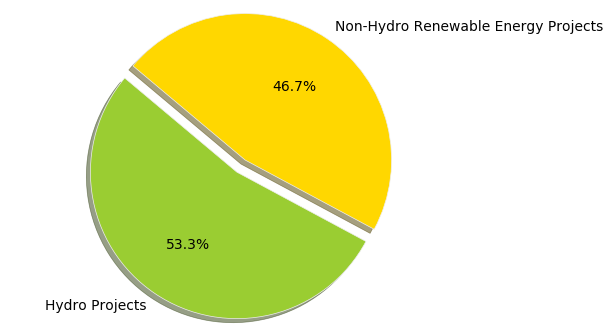

In [139]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [chile_hydro_total, chile_renewables_total]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Chile CDM Projects Hydro vs. Non-Hydro Renewable Energy 2019\n ', loc='center')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('ChileCDM_renewables_totals.png')
plt.show()

In [140]:
chile_renewables_reductions = chile_df_renewables['Amount Of Reductions (PDD ex-ante) per year in CP1 (PoA based on the sum of curr'].sum()

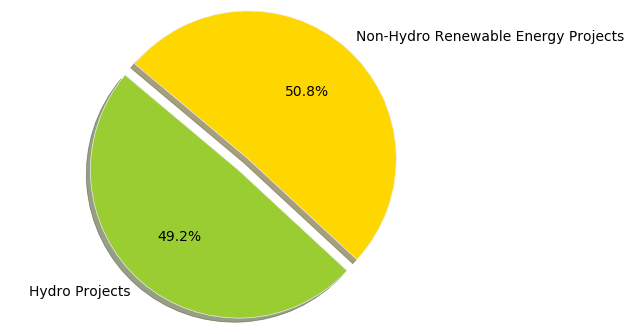

In [141]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [chile_hydro_reductions, chile_renewables_reductions]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Chile CDM Project Claimed Reductions Hydro vs. Non-Hydro Renewable Energy 2019\n ', loc='center')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('ChileCDM_renewables_reductions.png')
plt.show()

In [142]:
chile_renewables_money = chile_df_renewables['Total capital investment (USD)'].sum()

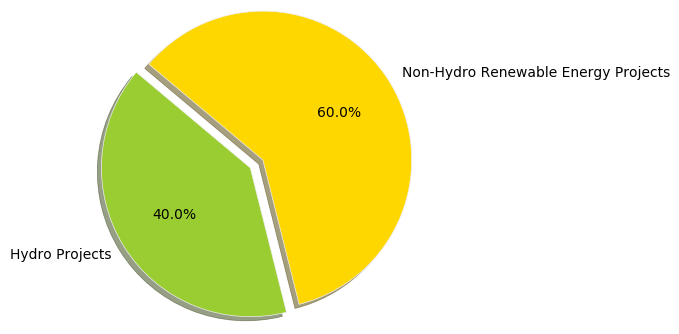

In [143]:
labels = ['Hydro Projects', 'Non-Hydro Renewable Energy Projects']
sizes = [chile_hydro_money, chile_renewables_money]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

#plt.title('Chile CDM Project Costs Hydro vs. Non-Hydro Renewable Energy 2019\n ', loc = 'center')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('ChileCDM_renewables_costs.png')
plt.show()

In [77]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Latin_Hydro_CDM_2019.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
latin_df_hydro.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()